# GIU NETW 1003 Kmeans Assginmnet

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function

import required libraries

In [12]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


> ### 1.1. Code for the distance function

write function to calculate the distance between a set of cluster heads and all the data points with the
Cluster_Distances = GUC_Distance ( Cluster_Heads, Data_points, Distance_Type)
* To inrease speed do that in matrix format using numpy
* This should produce a matrix withrowa equal to datapointscolumns equal K
* You should be able to calculate different types of Distance
    - Ecluidian
    - Manhattan
  

In [38]:
def GIU_Distance(Cluster_Heads, Data_points, Distance_Type):
    # Ensure Cluster_Heads and Data_points are numpy arrays
    Cluster_Heads = np.array(Cluster_Heads)
    Data_points = np.array(Data_points)

    # Calculate distances
    if Distance_Type == 'euclidean':
        distances = np.sqrt(np.sum((Data_points[:, np.newaxis] - Cluster_Heads)**2, axis=2))
    elif Distance_Type == 'manhattan':
        distances = np.sum(np.abs(Data_points[:, np.newaxis] - Cluster_Heads), axis=2)
    else:
        raise ValueError("Distance_Type should be 'euclidean' or 'manhattan'.")

    return distances

> ### 1.2. Code for K means function

Create the intial cluster heads
 1. For each data colom find the data ranges
 2. randomly generate a number of cluster heads equal to K (th number of clusters)   

> Loop until a stopping condition
> > in the loop do the following
> > 1. Use the GIU_Distance to calculate between each cluster head and all the points
> > 2. Find the value and index of the minimum value for each row.
> > 3. Use the index to represent the cluster head that this point will belong to.
> > 4. Calculate and record the mean distance for each cluster
> > 5. Use the mean distances to calculate a stopping condition (e.g the sum of mean distances)
> > 6. Update the value for the cluster heads by calculating the mean value for each cluster
> > 7. Calculate the Cluster Metric
> > > a number indicating the how good the clusters are . An example cluster metric is the **inertia** (sum of squared error between each point and its cluster center)

In [37]:


def GIU_Kmean(Data_points, Number_of_Clusters, Distance_Type='euclidean', max_iterations=100):
    # Initialize cluster centers by choosing random data points
    Cluster_Heads = Data_points[np.random.choice(Data_points.shape[0], Number_of_Clusters, replace=False)]

    # Calculate initial distances
    Cluster_Distance = GIU_Distance(Cluster_Heads, Data_points, Distance_Type)

    # Initialize cluster assignments and distances
    Cluster_Assignments = np.argmin(Cluster_Distance, axis=1)
    Cluster_Distance = np.min(Cluster_Distance, axis=1)

    # Initialize loop variables
    Previous_Cluster_Assignments = np.zeros(Data_points.shape[0])
    Cluster_Metric = np.sum(Cluster_Distance)

    # Loop until cluster assignments do not change
    while not np.array_equal(Cluster_Assignments, Previous_Cluster_Assignments):
        # Update previous cluster assignments
        Previous_Cluster_Assignments = Cluster_Assignments

        # Update cluster centers
        Cluster_Heads = np.array([Data_points[Cluster_Assignments == i].mean(axis=0) for i in range(Number_of_Clusters)])

        # Calculate distances
        Cluster_Distance = GIU_Distance(Cluster_Heads, Data_points, Distance_Type)

        # Update cluster assignments and distances
        Cluster_Assignments = np.argmin(Cluster_Distance, axis=1)
        Cluster_Distance = np.min(Cluster_Distance, axis=1)

        # Update loop variables
        Cluster_Metric = np.sum(Cluster_Distance)

    Final_Cluster_Distance = Cluster_Distance

    return [Final_Cluster_Distance, Cluster_Metric, Cluster_Assignments, Cluster_Heads]

## 2. Display Results

* below is a an example fuction that displayes Clusters in 2D

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures

* The function is a helper function that is originaly be found in
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [34]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function

In [32]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


> #### 2.2. Example 1 : Circular Data Gen and display

* below is an example of how to use the funciton
  *  prepare the figure size and background
   > *this part can be replaced by a number of subplots
  
  * Produce a data set that represent the x and y o coordinates of a circle
   > *this part can be replaced by data that you import froma file
  
  * Data is displayed
   > *to display the data only it is assumed that the number of clusters is zero which is the default of the fuction

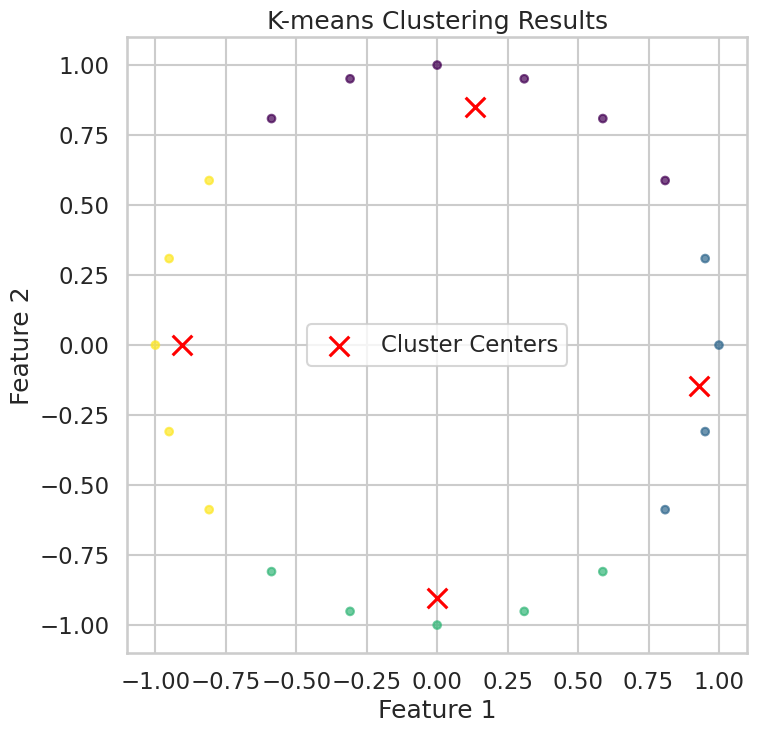

In [33]:



def display_kmeans_results(Data_points, Cluster_Assignments, Cluster_Heads):
    plt.figure(figsize=(8, 8))

    # Plot data points with colors representing clusters
    plt.scatter(Data_points[:, 0], Data_points[:, 1], c=Cluster_Assignments, cmap='viridis', alpha=0.7, s=30)

    # Plot cluster centers
    plt.scatter(Cluster_Heads[:, 0], Cluster_Heads[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering Results')
    plt.legend()
    plt.show()


plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle
# this part can be replaced by data that you import froma file
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Assuming you have Data_points, Number_of_Clusters, Cluster_Assignments, Cluster_Heads defined
Final_Cluster_Distance, Cluster_Metric, Cluster_Assignments, Cluster_Heads = GIU_Kmean(X, 4, 'euclidean')

# Display the results
display_kmeans_results(X, Cluster_Assignments, Cluster_Heads)



> #### 2.3. Example 2 : Multipl blob Data Gen and display

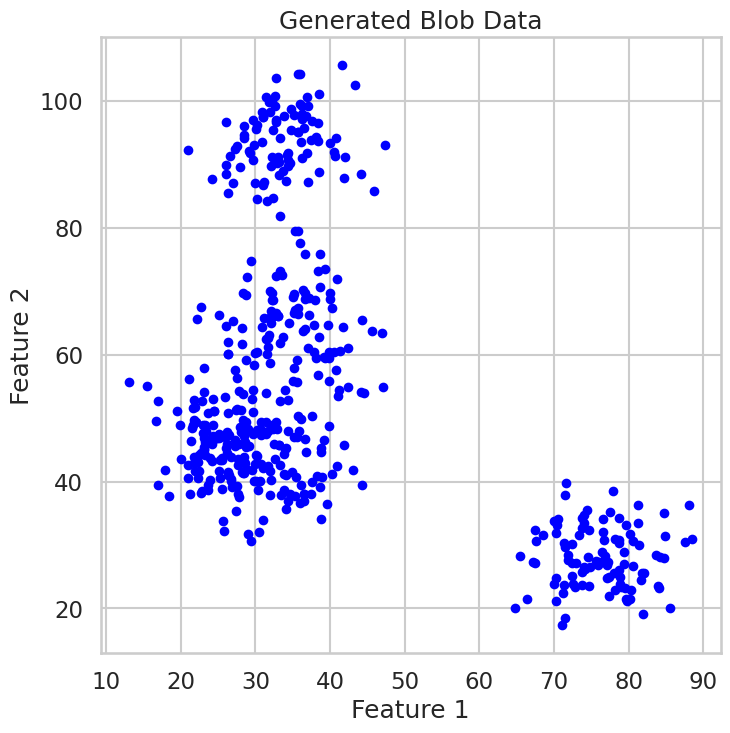

In [29]:

import numpy as np
import matplotlib.pyplot as plt

def generate_blob_data(num_blobs, num_points_per_blob, blob_std):
    data = []
    for _ in range(num_blobs):
        center = np.random.rand(2) * 100  # Random center within a 100x100 grid
        blob = np.random.normal(center, blob_std, size=(num_points_per_blob, 2))
        data.append(blob)
    return np.vstack(data)

def display_blob_data(Data_points):
    plt.figure(figsize=(8, 8))
    plt.scatter(Data_points[:, 0], Data_points[:, 1], c='blue', s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Blob Data')
    plt.show()

# Generate blob data
Data_points = generate_blob_data(num_blobs=5, num_points_per_blob=100, blob_std=5)

# Display the blob data
display_blob_data(Data_points)



## 3. Testing the GIU_Kmean function on Simple 2D
1. Apply the GIU_Kmean fucntion to 2D Data provided by example 1 and Example 2
2. Try a varing number of cluster that range from 2 to 10 cluster on each set
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps

## 4. Testing the GIU_Kmean function on a big dataset
1. Apply the GIU_Kmean fucntion to provided data set  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps

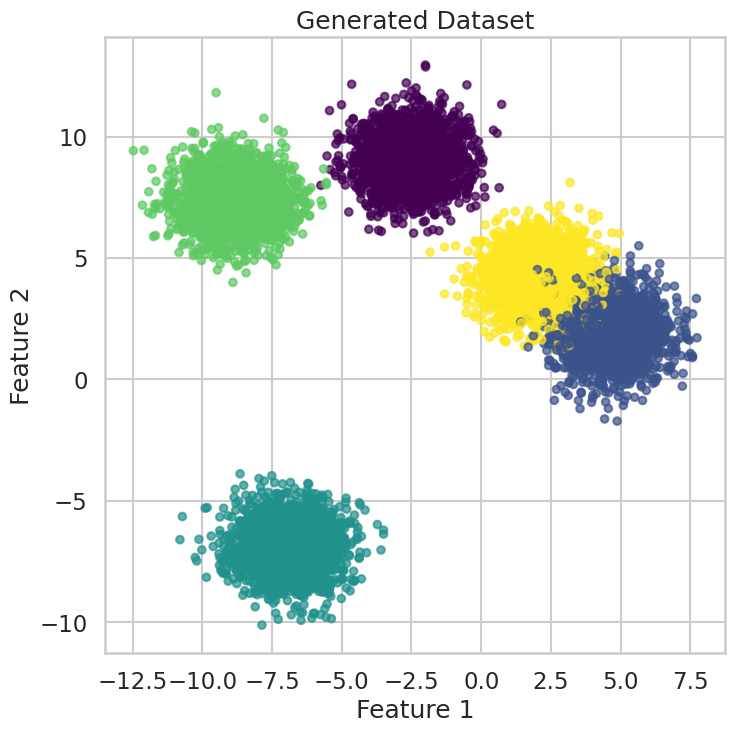

In [30]:
from sklearn.datasets import make_blobs

# Generate a large dataset with 10,000 samples, 2 features, and 5 clusters
n_samples = 10000
n_features = 2
n_clusters = 5

# Random state for reproducibility
random_state = 42

# Generate the dataset
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Display the generated dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.show()
